**Цель работы:**

Изучение связи между признаками двумерного набора данных,
визуализация данных.

### Описание предметной области

Вариант №10

Набор данных: credit_risk2.csv

### 1.Чтение файла и предварительная обработка данных

#### 1.1 Чтение файла

In [2]:
# импорт библиотек, чтение файла с помощью pandas
import pandas as pd
df = pd.read_csv('credit_risk2.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              652 non-null    int64  
 1   Age             652 non-null    float64
 2   Income          652 non-null    int64  
 3   Home            652 non-null    object 
 4   Emp_length      643 non-null    float64
 5   Intent          652 non-null    object 
 6   Amount          652 non-null    int64  
 7   Rate            586 non-null    float64
 8   Status          652 non-null    int64  
 9   Percent_income  652 non-null    float64
 10  Default         652 non-null    object 
 11  Cred_length     652 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 61.3+ KB


,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,652.000000,652.000000,652.000000,643.000000,652.000000,586.000000,652.000000,652.000000,652.000000
mean,325.495399,24.285276,90008.855828,4.601866,18800.996933,12.289471,0.601227,0.279831,3.012270
std,188.352535,7.841061,69530.312525,7.281616,9152.896250,3.272772,0.490022,0.150231,0.808843
min,0.000000,21.000000,9600.000000,0.000000,1000.000000,5.420000,0.000000,0.010000,2.000000
25%,162.750000,23.000000,44000.000000,2.000000,10000.000000,10.250000,0.000000,0.160000,2.000000
50%,325.500000,24.000000,69998.000000,4.000000,21850.000000,12.180000,1.000000,0.280000,3.000000
75%,488.250000,25.000000,128499.000000,7.000000,25000.000000,14.720000,1.000000,0.380000,4.000000
max,649.000000,144.000000,500000.000000,123.000000,35000.000000,21.210000,1.000000,0.830000,4.000000


Итак, из вывода df.info() мы видим, что есть много нулевых значений для Rate и Emp_length. Из вывода df.describe() мы видим выбросы в столбцах Age и Emp_length.

#### 1.2 Удаление пропусков

Пропуски в Emp_length мы удалим, в Rate заменим на среднее значение, так как там пропущено ~10% от всех данных, что очень много для простого удаления.

In [3]:
# Удаляем пропуски в Emp_length
df = df.dropna(subset=['Emp_length'])
# Заполняем пропуски в Rate средними значениями
df.loc[:, 'Rate'] = df['Rate'].fillna(df['Rate'].mean())
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 643 entries, 0 to 651
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              643 non-null    int64  
 1   Age             643 non-null    float64
 2   Income          643 non-null    int64  
 3   Home            643 non-null    object 
 4   Emp_length      643 non-null    float64
 5   Intent          643 non-null    object 
 6   Amount          643 non-null    int64  
 7   Rate            643 non-null    float64
 8   Status          643 non-null    int64  
 9   Percent_income  643 non-null    float64
 10  Default         643 non-null    object 
 11  Cred_length     643 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 65.3+ KB


,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,324.618974,24.306376,90711.615863,4.601866,18928.227061,12.323564,0.600311,0.280264,3.013997
std,188.840030,7.892052,69482.165915,7.281616,9059.360332,3.089434,0.490216,0.150678,0.809671
min,0.000000,21.000000,9600.000000,0.000000,1000.000000,5.790000,0.000000,0.010000,2.000000
25%,161.500000,23.000000,45000.000000,2.000000,12000.000000,10.590000,0.000000,0.160000,2.000000
50%,323.000000,24.000000,70000.000000,4.000000,22000.000000,12.323564,1.000000,0.280000,3.000000
75%,488.500000,25.000000,129998.000000,7.000000,25000.000000,14.480000,1.000000,0.380000,4.000000
max,649.000000,144.000000,500000.000000,123.000000,35000.000000,21.210000,1.000000,0.830000,4.000000


#### 1.3 Проверка дубликатов

Удаление явных дубликатов

In [4]:
# Ищем явные дубликаты
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
647    False
648    False
649    False
650     True
651     True
Length: 643, dtype: bool

In [5]:
# Удаляем явные дубликаты
df = df.drop_duplicates().reset_index(drop=True)
# Проверяем результат
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
636    False
637    False
638    False
639    False
640    False
Length: 641, dtype: bool

Удаление неявных дубликатов

In [6]:
# Проверка столбца Home
df['Home'].value_counts()

Home
RENT        412
MORTGAGE    130
OWN          96
OTHER         2
RENET         1
Name: count, dtype: int64

In [7]:
# Удаление неявных дулбикатов столбца Home
df.loc[:, 'Home'] = df['Home'].replace('RENET', 'RENT')
df['Home'].value_counts()

Home
RENT        413
MORTGAGE    130
OWN          96
OTHER         2
Name: count, dtype: int64

In [8]:
# Проверка столбца Intent
df['Intent'].value_counts()

Intent
EDUCATION            142
VENTURE              116
PERSONAL             109
MEDICAL              107
DEBTCONSOLIDATION    100
HOMEIMPROVEMENT       67
Name: count, dtype: int64

In [9]:
# Проверка столбца Default
df['Default'].value_counts()

Default
N     489
Y     149
No      3
Name: count, dtype: int64

In [10]:
# Удаление неявных дулбикатов столбца Default
df.loc[:, 'Default'] = df['Default'].replace('No', 'N')
df['Default'].value_counts()

Default
N    492
Y    149
Name: count, dtype: int64

#### 1.4 Проверка типов данных

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              641 non-null    int64  
 1   Age             641 non-null    float64
 2   Income          641 non-null    int64  
 3   Home            641 non-null    object 
 4   Emp_length      641 non-null    float64
 5   Intent          641 non-null    object 
 6   Amount          641 non-null    int64  
 7   Rate            641 non-null    float64
 8   Status          641 non-null    int64  
 9   Percent_income  641 non-null    float64
 10  Default         641 non-null    object 
 11  Cred_length     641 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 60.2+ KB


Типы данных корректны

#### 1.5 Удаление выбросов

In [12]:
# Удаление явных аномалий (выбросов)
# Возраст > 100 лет и Стаж > 60 лет — это явные ошибки ввода.
df = df[df['Age'] < 100]
df = df[df['Emp_length'] < 60]

# Проверим, что удалилось
print(f"Размер датасета после удаления выбросов: {df.shape}")
print(df[['Age', 'Emp_length']].describe())


Размер датасета после удаления выбросов: (636, 12)
              Age  Emp_length
count  636.000000  636.000000
mean    23.787736    4.227987
std      1.486074    3.047121
min     21.000000    0.000000
25%     23.000000    2.000000
50%     24.000000    4.000000
75%     25.000000    7.000000
max     26.000000   11.000000


### 2. Построение и анализ точечной диаграммы

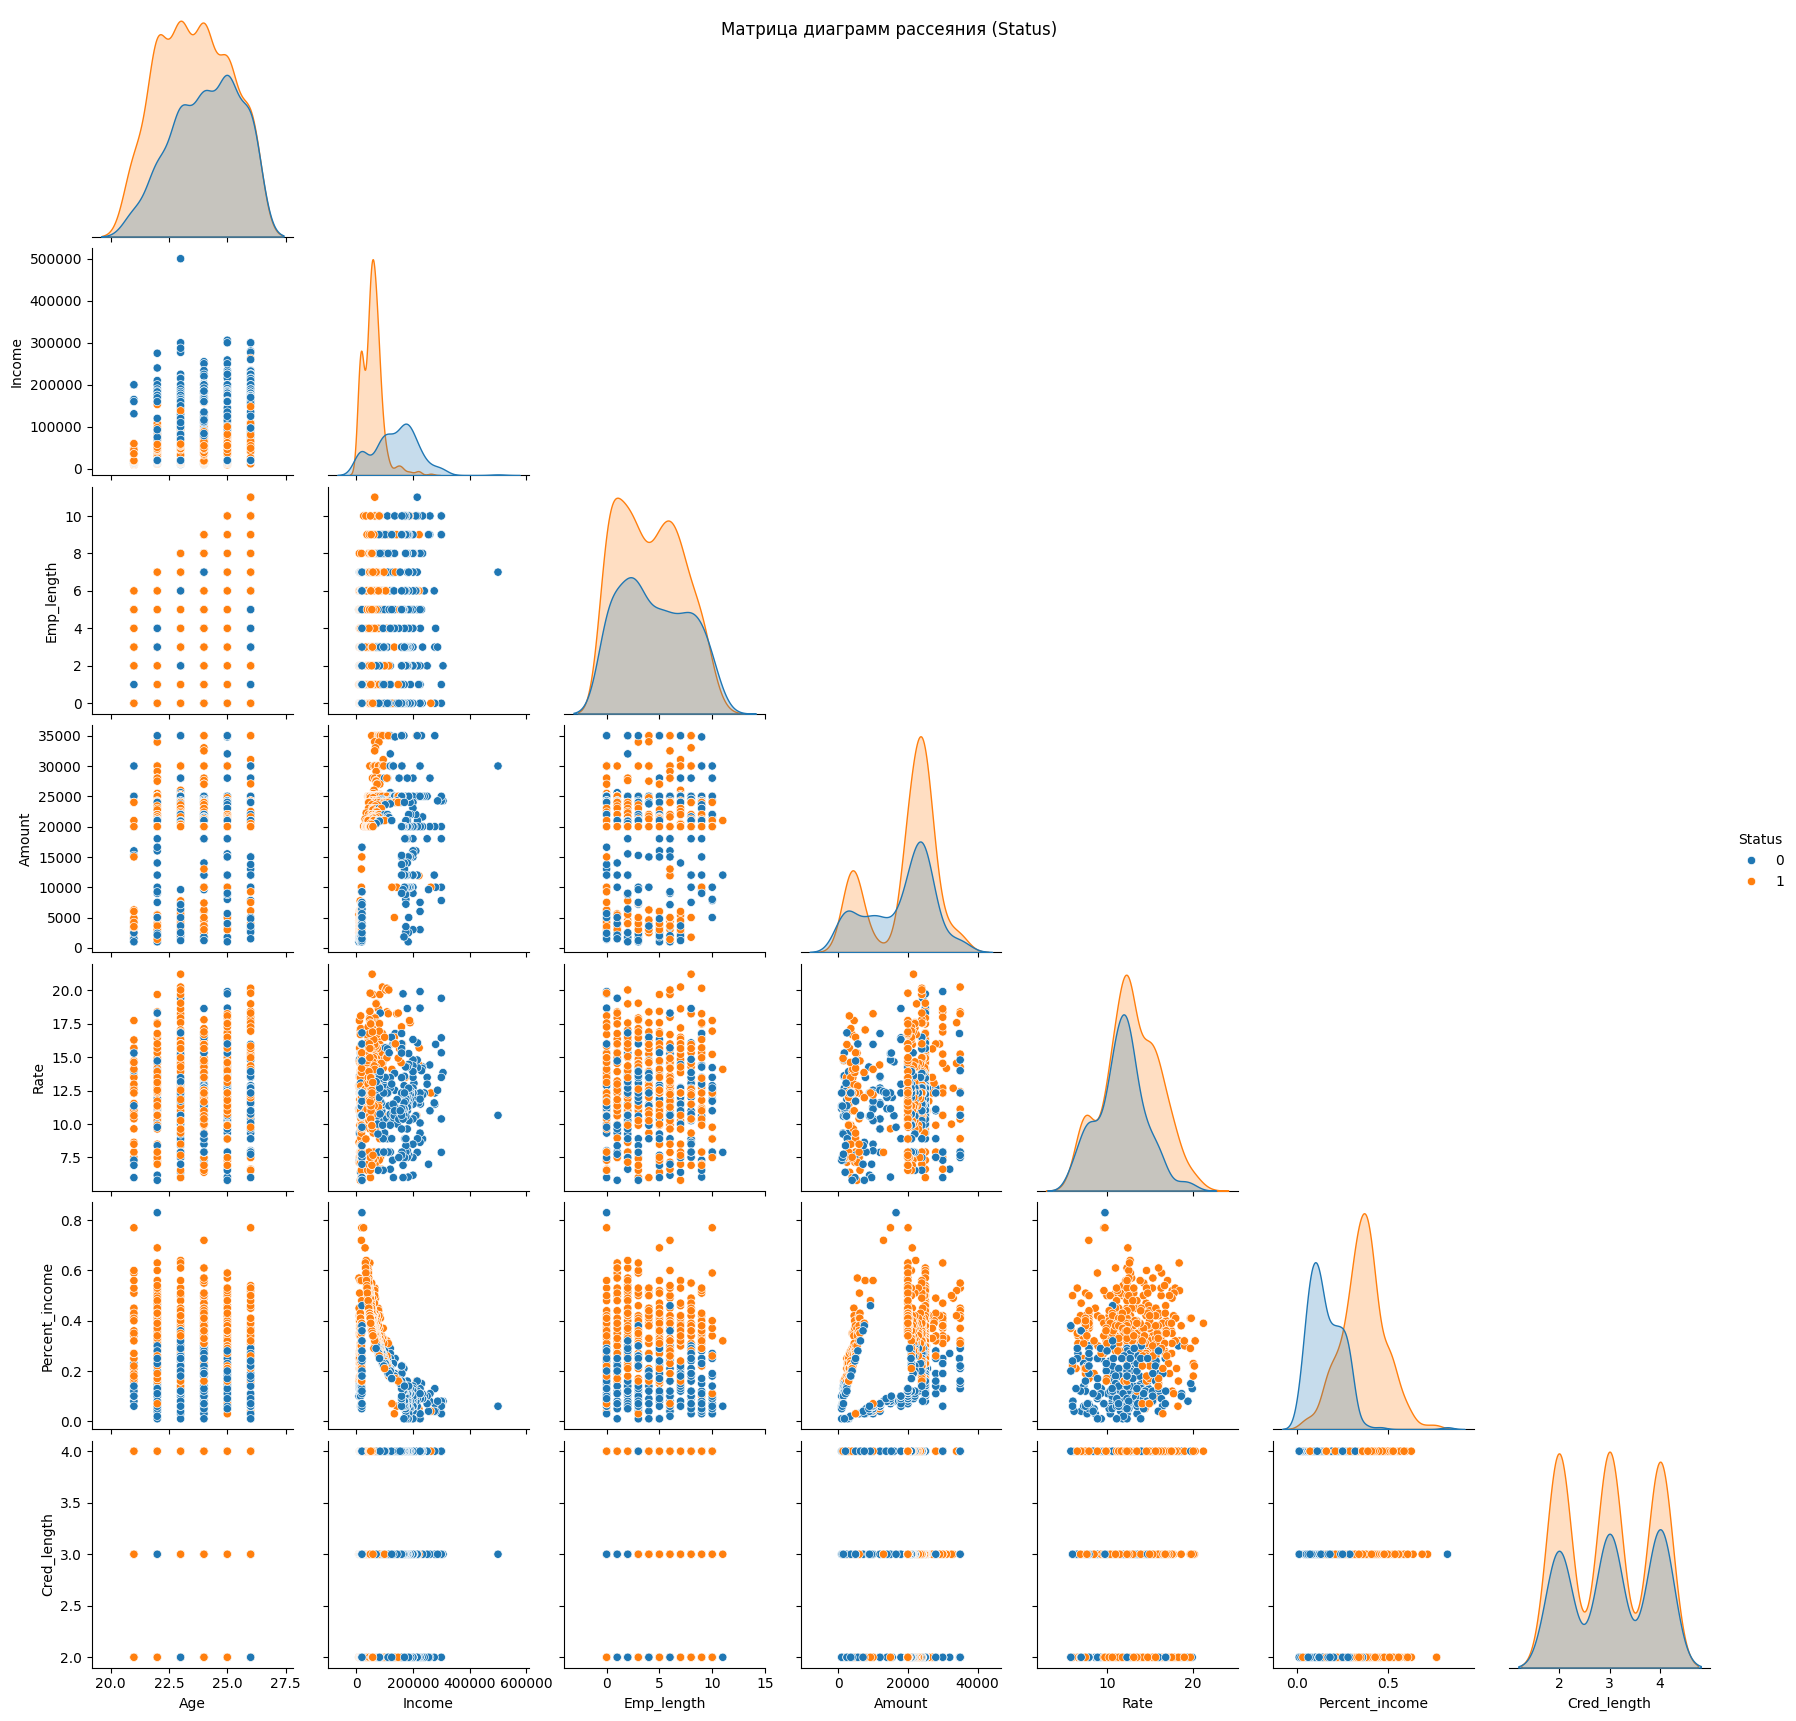

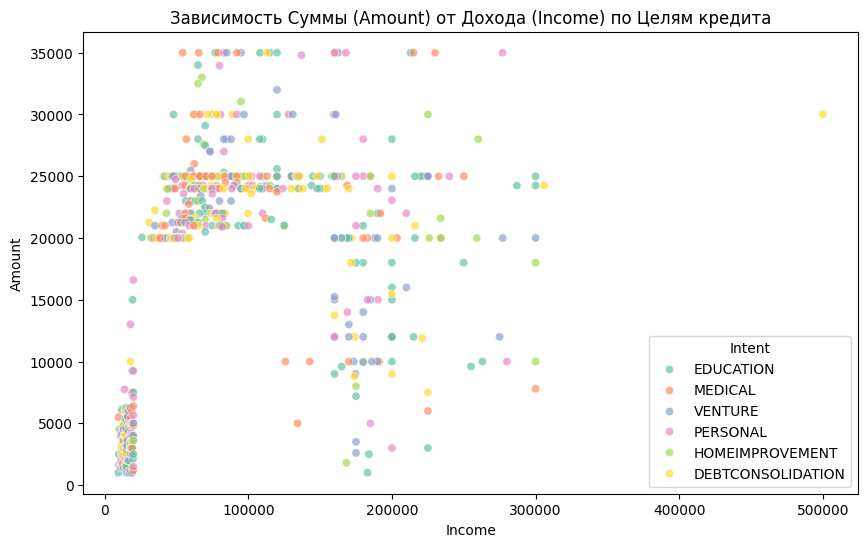

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
cols_to_plot = ['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income', 'Cred_length']

# Строим матрицу (Pairplot)
g = sns.pairplot(df[cols_to_plot + ['Status']], hue='Status', corner=True)
g.fig.suptitle("Матрица диаграмм рассеяния (Status)")
plt.show()

# 2. Дополнительный график "по категориям"
# Посмотрим зависимость Суммы от Дохода, но в разрезе Цели кредита (Intent)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Amount', hue='Intent', alpha=0.7, palette='Set2')
plt.title("Зависимость Суммы (Amount) от Дохода (Income) по Целям кредита")
plt.show()


1. Ключевые зависимости от Целевой переменной (Status):

Цветовое разделение показывает, какие факторы лучше всего разделяют надежных клиентов (синий, 0) и дефолтных (оранжевый, 1):

Percent_income (Долговая нагрузка): Самый мощный предиктор. На диагональном графике (Percent_income) четко видно, что пик распределения дефолтов (оранжевый) сильно смещен вправо (в сторону высоких значений нагрузки > 0.4), тогда как надежные клиенты сконцентрированы слева. На скаттер-плотах (последний столбец) оранжевые точки также доминируют в верхней части графика.

Rate (Процентная ставка): Оранжевое распределение также смещено вправо относительно синего. Высокие ставки (> 12-14%) чаще встречаются у дефолтных заемщиков.

Income (Доход): В зоне высоких доходов (правая часть графика Income) оранжевых точек (дефолтов) крайне мало. Доход служит "подушкой безопасности".

2. Взаимосвязи между признаками (Корреляции):

Income vs Amount: Видна «воронкообразная» зависимость. Люди с низким доходом берут только маленькие кредиты, а люди с высоким доходом берут любые суммы (облако точек расширяется вправо).

Income vs Percent_income: Четкая гипербола. С ростом дохода доля кредита в доходе неизбежно падает, стремясь к нулю.

3. Дополнительный график (Intent vs Amount/Income):

График «Зависимость Суммы от Дохода по Целям» показывает интересные «полосы» (стратификацию). Кредиты часто выдаются круглыми суммами (5000, 10000, 15000, 25000), образуя горизонтальные линии.

Для всех целей (Intent) прослеживается «потолок» суммы кредита, который растет с доходом.

Вывод:
Матрица рассеяния подтверждает, что главными факторами риска являются высокая долговая нагрузка (Percent_income) и высокая ставка (Rate). После очистки данных проявилась естественная корреляция возраста и кредитной истории.

### 3. Построение гистограммы

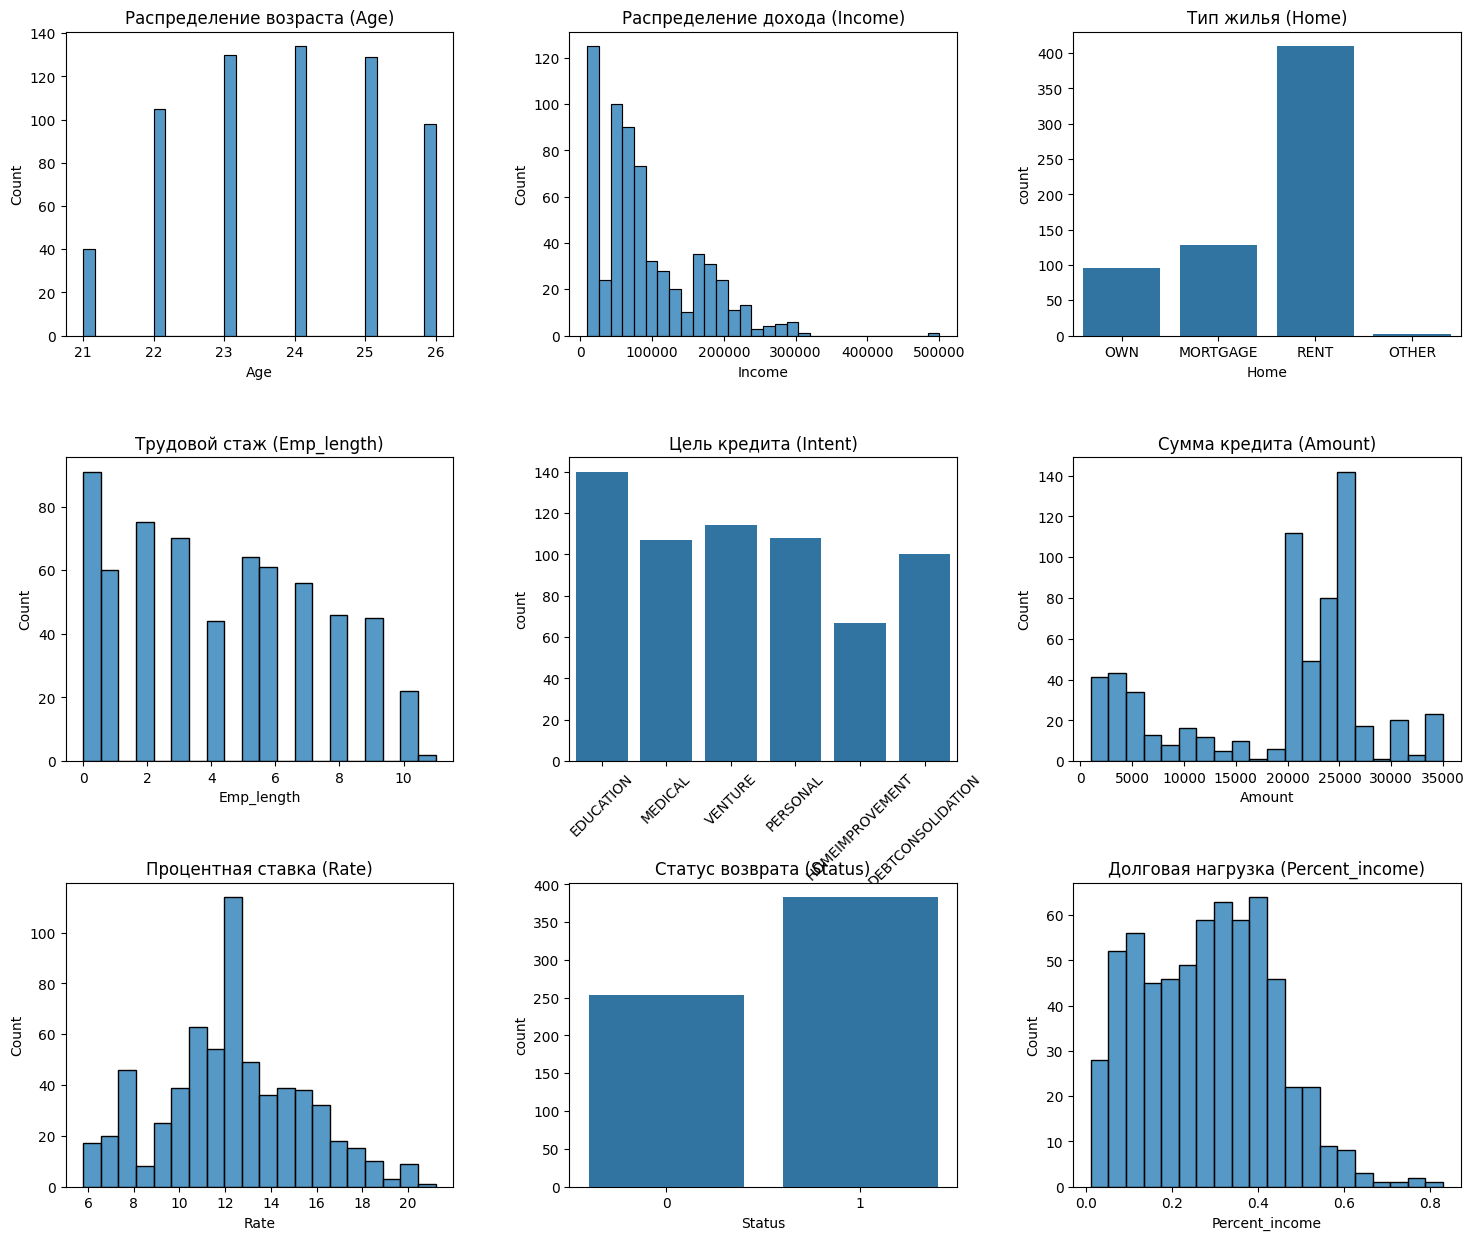

In [46]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.3) # Добавляем место между графиками

# --- Числовые признаки (Гистограммы) ---
# Age
sns.histplot(df['Age'], bins=30, ax=ax[0,0])
ax[0,0].set_title('Распределение возраста (Age)')

# Income
sns.histplot(df['Income'], bins=30, ax=ax[0,1])
ax[0,1].set_title('Распределение дохода (Income)')

# Emp_length
sns.histplot(df['Emp_length'], bins=20, ax=ax[1,0])
ax[1,0].set_title('Трудовой стаж (Emp_length)')

# Amount
sns.histplot(df['Amount'], bins=20, ax=ax[1,2])
ax[1,2].set_title('Сумма кредита (Amount)')

# Rate
sns.histplot(df['Rate'], bins=20, ax=ax[2,0])
ax[2,0].set_title('Процентная ставка (Rate)')

# Percent_income
sns.histplot(df['Percent_income'], bins=20, ax=ax[2,2])
ax[2,2].set_title('Долговая нагрузка (Percent_income)')


# --- Категориальные признаки (Столбчатые диаграммы) ---
# Home (вместо hist используем countplot)
sns.countplot(data=df, x='Home', ax=ax[0,2])
ax[0,2].set_title('Тип жилья (Home)')

# Intent (вместо hist используем countplot)
sns.countplot(data=df, x='Intent', ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=45) # Поворачиваем подписи, чтобы не наезжали
ax[1,1].set_title('Цель кредита (Intent)')

# Status (целевая переменная)
sns.countplot(data=df, x='Status', ax=ax[2,1])
ax[2,1].set_title('Статус возврата (Status)')

plt.show()

1. Числовые признаки (Гистограммы)

Возраст (Age):
Абсолютное большинство клиентов находится в возрасте 22–26 года.
Клиентов старше 26-30 лет в выборке крайне мало. Это подтверждает, что банк работает преимущественно с молодежью.

Трудовой стаж (Emp_length):
Самая частая группа — люди с нулевым или минимальным стажем (0-1 год).
Наблюдается плавное убывание количества клиентов с ростом стажа до 10 лет.

Доход (Income):
Основная масса получает до 100 000 у.е., но есть значимое количество людей с доходом 100-200 тыс., что говорит о присутствии высокооплачиваемых специалистов даже среди молодежи.

Сумма кредита (Amount):
Два пика в районе 5 000 и 25 000.

Процентная ставка (Rate):
Распределение близко к нормальному, пик приходится на 11-12%.

2. Категориальные признаки (Столбчатые диаграммы)

Тип жилья (Home):
Подавляющее большинство клиентов — арендаторы (RENT, >400 чел).
Владельцев ипотеки (MORTGAGE) примерно в 3 раза меньше.
Это логично сочетается с молодым возрастом аудитории (в 23 года мало кто имеет свое жилье).

Цель кредита (Intent):
Спрос распределен равномерно по основным категориям: Образование (EDUCATION), Медицина (MEDICAL), Венчур (VENTURE).
Меньше всего кредитов на Ремонт (HOMEIMPROVEMENT), что опять же логично — арендаторам ремонт не нужен.

Статус возврата (Status):
Сохраняется дисбаланс классов: дефолтных (1) больше, чем надежных (0).

Общий вывод по Пункту 3:
После анализа графиков портрет типичного клиента стал предельно ясен: это молодой человек 22–26 лет, арендующий жилье, с опытом работы 0–2 года и доходом до 80 000, который берет кредит либо на мелкие нужды (5к), либо крупную сумму (25к).

### 4. Корреляция и ковариация

Матрица ковариации
                         Age        Income    Emp_length        Amount  \
Age                 2.208416  3.205191e+04      0.816974  2.449878e+03   
Income          32051.907867  4.800924e+09  36478.068279  1.819348e+08   
Emp_length          0.816974  3.647807e+04      9.284948  4.589679e+03   
Amount           2449.877804  1.819348e+08   4589.679221  8.198348e+07   
Rate                0.110358  9.208727e+03     -0.345099  5.158193e+03   
Status             -0.122367 -1.990740e+04     -0.085542  3.610577e+02   
Percent_income     -0.035783 -6.525434e+03     -0.027740  4.552645e+02   
Cred_length         0.003008  2.438440e+02     -0.218979 -1.284144e+02   

                       Rate        Status  Percent_income  Cred_length  
Age                0.110358     -0.122367       -0.035783     0.003008  
Income          9208.726773 -19907.395214    -6525.434130   243.844042  
Emp_length        -0.345099     -0.085542       -0.027740    -0.218979  
Amount          5158.1

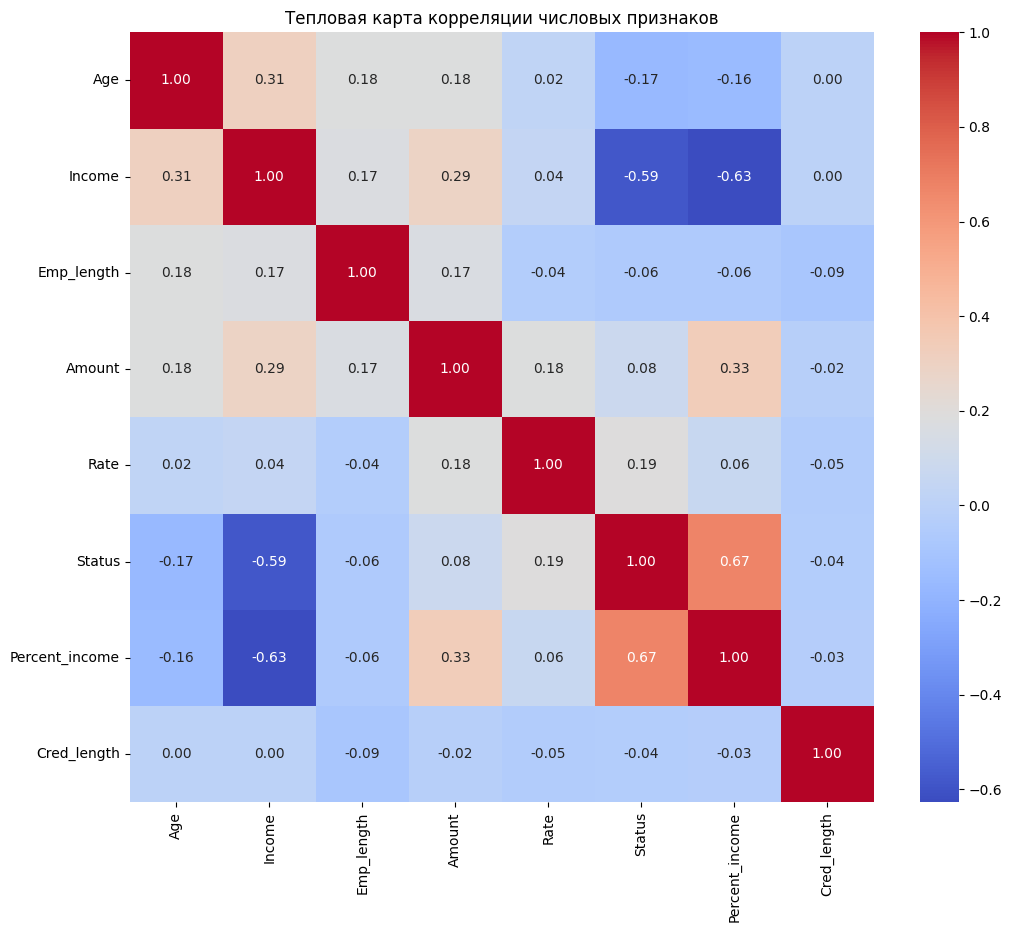

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Выбираем только числовые столбцы для анализа
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Исключаем 'Id', так как он не несет смысла для корреляции
numerical_cols.remove('Id')

# 1. Расчет матрицы ковариации
covariance_matrix = df[numerical_cols].cov()
print("Матрица ковариации")
print(covariance_matrix)

# 2. Расчет матрицы корреляции
correlation_matrix = df[numerical_cols].corr()
print("Матрица корреляции")
print(correlation_matrix)

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции числовых признаков')
plt.show()


1. Основные корреляции с целевой переменной (Status):

Percent_income и Status (+0.67): Сильная положительная связь. Это ключевой вывод всего исследования: долговая нагрузка (доля платежа в доходе) является главным индикатором дефолта. Чем выше этот процент, тем выше риск.

Income и Status (-0.59): Умеренная отрицательная связь. Доход является вторым по значимости фактором: высокие доходы существенно снижают вероятность дефолта.

Rate и Status (+0.19): Слабая положительная связь. Ставка кредита влияет на риск, но не так сильно, как нагрузка или доход.

Age и Status (-0.17): Слабая отрицательная связь. Более старшие заемщики (в рамках этой молодой выборки) чуть более надежны, но возраст не является определяющим фактором.

2. Внутренние связи между признаками:

Income и Percent_income (-0.63): Сильная обратная зависимость.

Age и Income (+0.31): Умеренная положительная связь. С возрастом доход постепенно растет, что логично даже для диапазона 21-26 лет.

Age и Emp_length (+0.18): Слабая положительная связь. Старше возраст — больше стаж.

Amount и Percent_income (+0.33): Умеренная положительная связь. Чем больше сумма кредита, тем выше нагрузка на бюджет.

3. Важное наблюдение (Cred_length):
Корреляция Age и Cred_length составляет всего 0.00. Это очень странно, по идее эти величины должны коррелировать.

Возможная причина: В выборке слишком узкий диапазон возраста (21-26 лет), поэтому разница в кредитной истории (которая у всех 2-4 года) не успевает проявиться статистически значимо на фоне шума.

Вывод:
Анализ подтверждает, что банк в первую очередь должен смотреть на Percent_income и Income при оценке рисков. Остальные параметры (возраст, стаж, ставка) имеют второстепенное значение.

### 5. Графики по варианту

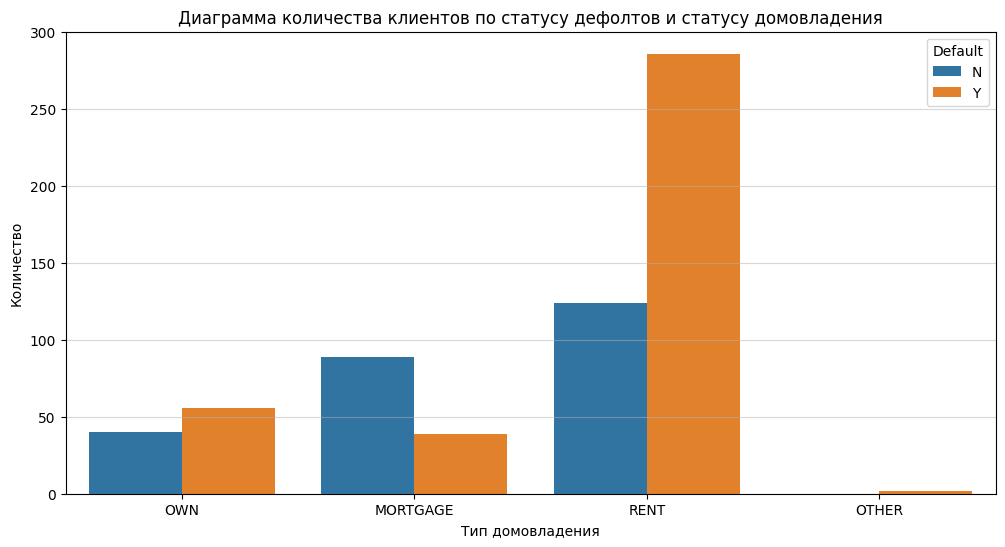

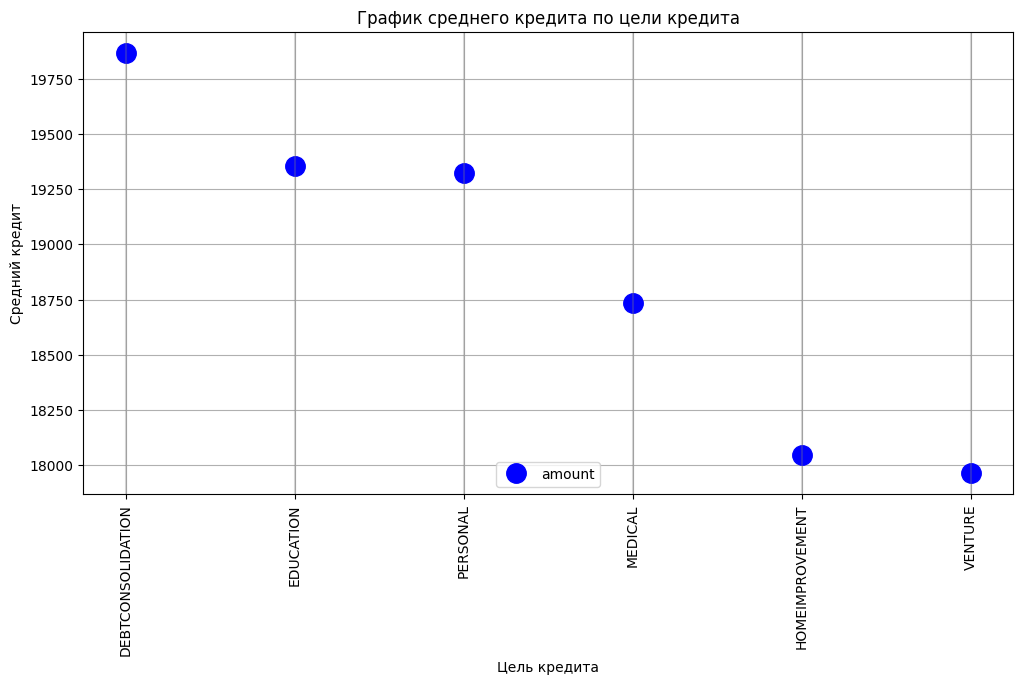

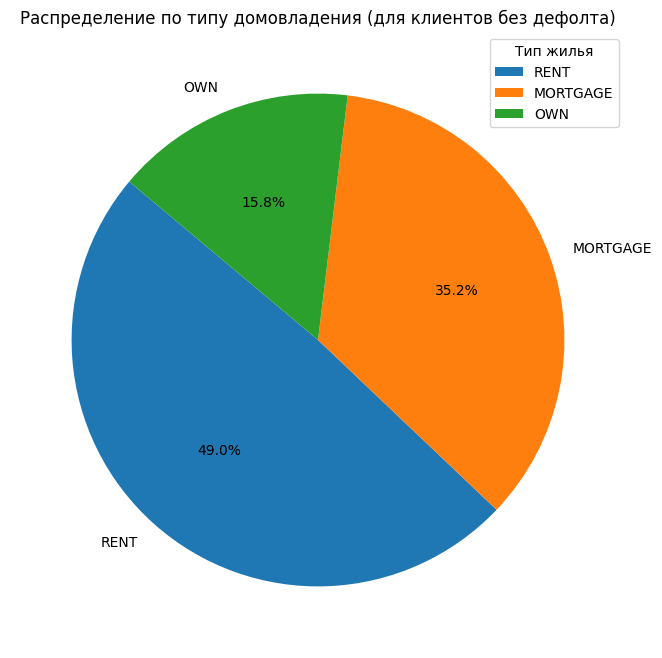

In [45]:
# Подготовка данных:
df_viz = df.copy()

df_viz['default_str'] = df_viz['Status'].map({0: 'N', 1: 'Y'})

# Задание 1: Seaborn Countplot (Status по Home)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_viz, x='Home', hue='default_str')
plt.title('Диаграмма количества клиентов по статусу дефолтов и статусу домовладения')
plt.xlabel('Тип домовладения')
plt.ylabel('Количество')
plt.legend(title='Default')
plt.grid(axis='y', alpha=0.5)
plt.show()

# Задание 2: Pivot Table и Dot Plot (Средняя сумма по Intent)
pivot_table = df_viz.pivot_table(index='Intent', values='Amount', aggfunc='mean').sort_values(by='Amount', ascending=False)

plt.figure(figsize=(12, 6))
# Строим точечный график (dot plot)
plt.plot(pivot_table.index, pivot_table['Amount'], 'bo', markersize=14, label='amount')
# Добавляем вертикальные линии сетки для каждого пункта
for idx in pivot_table.index:
    plt.axvline(x=idx, color='gray', linestyle='-', alpha=0.3)
plt.grid(True)
plt.title('График среднего кредита по цели кредита')
plt.ylabel('Средний кредит')
plt.xlabel('Цель кредита')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Задание 3: Matplotlib Pie Chart (Home для default='N')
df_no_default = df_viz[df_viz['default_str'] == 'N']
home_counts = df_no_default['Home'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(home_counts, labels=home_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение по типу домовладения (для клиентов без дефолта)')
plt.legend(title='Тип жилья')
plt.show()


1. Диаграмма количества клиентов по статусу дефолтов и домовладения
Основной вывод: Тип жилья является критическим фактором риска.
Категория RENT (Аренда): Самая проблемная зона. Здесь количество дефолтов (оранжевый столбец) более чем в 2 раза превышает количество успешных возвратов. Для банка клиент-арендатор в этой возрастной группе (21-26 лет) — это сигнал высокого риска.
Категория MORTGAGE (Ипотека): Самая надежная зона. Ситуация зеркальная: возвратов в 2 раза больше, чем дефолтов. Наличие ипотеки говорит о стабильном доходе и финансовой дисциплине.
Категория OWN (Собственность): Промежуточная ситуация, дефолтов немного больше, чем возвратов.

2. График среднего кредита по цели кредита
Основной вывод: Цель кредита слабо влияет на средний чек, но есть лидеры.
DEBTCONSOLIDATION (Рефинансирование): Лидер по средней сумме (~ 19 800 у.е.). Люди объединяют долги в один крупный.
EDUCATION (Образование): Второе место (~ 19 400 у.е.). Образование стоит дорого.
VENTURE и HOMEIMPROVEMENT: Аутсайдеры (~ 18 000 у.е.). На стартапы и ремонт выдают (или просят) чуть меньше.
Диапазон разброса средних значений узкий (всего ~ 1800 у.е.), что говорит о стандартизации кредитных продуктов.

3. Распределение по типу домовладения для надежных клиентов
Основной вывод: Среди "хороших" клиентов арендаторы всё равно составляют большинство (49.0%), просто потому что их физически много в выборке.
MORTGAGE: Занимает весомую долю (35.2%) среди надежных заемщиков, что подтверждает статус ипотечников как качественного сегмента.
OWN: Самая малочисленная группа (15.8%).

Итог по пункту 5:
Банку следует пересмотреть скоринговую политику для арендаторов (RENT), возможно, снизив им кредитные лимиты, так как дефолтность в этом сегменте зашкаливает. Ипотечники, напротив, являются целевым сегментом для выдачи новых займов.

### 6. График hexagonal binning plot

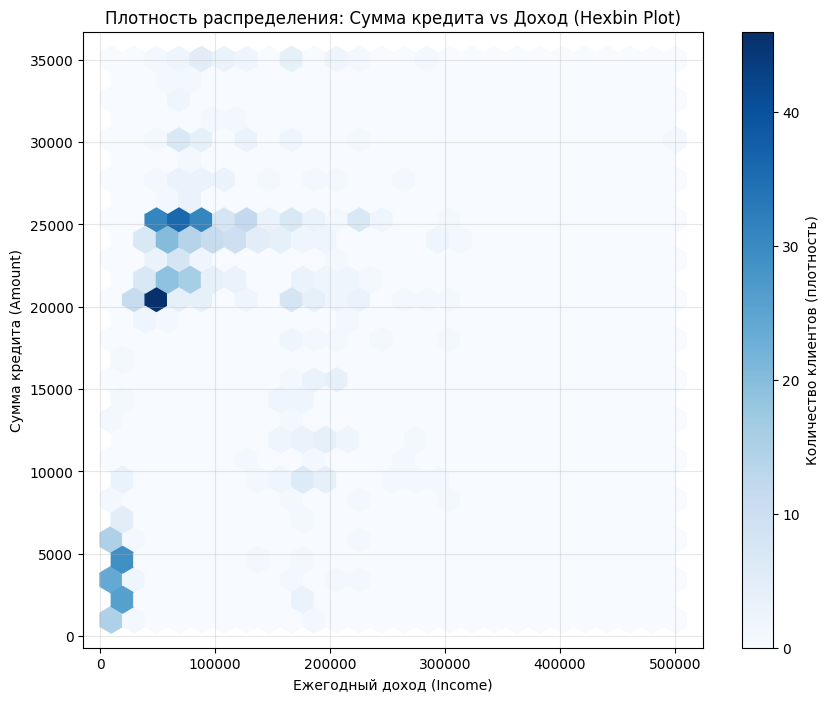

In [23]:
plt.figure(figsize=(10, 8))

# Строим hexbin plot для Income и Amount
hb = plt.hexbin(df['Income'], df['Amount'], gridsize=25, cmap='Blues')

# Добавляем colorbar
cb = plt.colorbar(hb, label='Количество клиентов (плотность)')

plt.title('Плотность распределения: Сумма кредита vs Доход (Hexbin Plot)')
plt.xlabel('Ежегодный доход (Income)')
plt.ylabel('Сумма кредита (Amount)')
plt.grid(alpha=0.3)

plt.show()

1. Ядро портфеля:
Самая плотная область (темно-синий шестиугольник) расположена в координатах:
Доход: 50 000 у.е.
Кредит: 20 000 у.е.
Это означает, что типичный клиент банка — представитель среднего класса, который берет довольно крупный заем (около 40% от годового дохода). Именно в этом сегменте сконцентрированы основные риски и прибыль банка.

2. Кредитный потолок:
На графике четко видна граница доступного кредита.
Для доходов < 30 000 максимальная сумма кредита не превышает 10 000.
Для доходов > 50 000 «потолок» резко поднимается до 25 000 и дальше практически не растет, даже если доход достигает 200 000.
Банк явно использует жесткие правила скоринга, ограничивая максимальную сумму займа цифрой 25 000 – 35 000 у.е. для большинства клиентов.

3. Сегментация:
Студенты/Микрозаймы: Плотный кластер в левом нижнем углу (Доход < 20к, Кредит < 5к).
Средний класс: Широкое облако в центре (Доход 40-80к, Кредит 10-25к).
VIP: Правая часть графика (Доход > 100к) заселена редко. Богатые клиенты берут кредиты реже, и их суммы не сильно отличаются от "среднего класса", что может говорить о том, что банк специализируется на рознице, а не на VIP-обслуживании.

Вывод:
Политика банка консервативна в отношении максимальной суммы кредита (есть жесткий «потолок»), но агрессивна в отношении долговой нагрузки для среднего класса (разрешает кредиты до 40-50% от годового дохода).

### 7. График boxplot

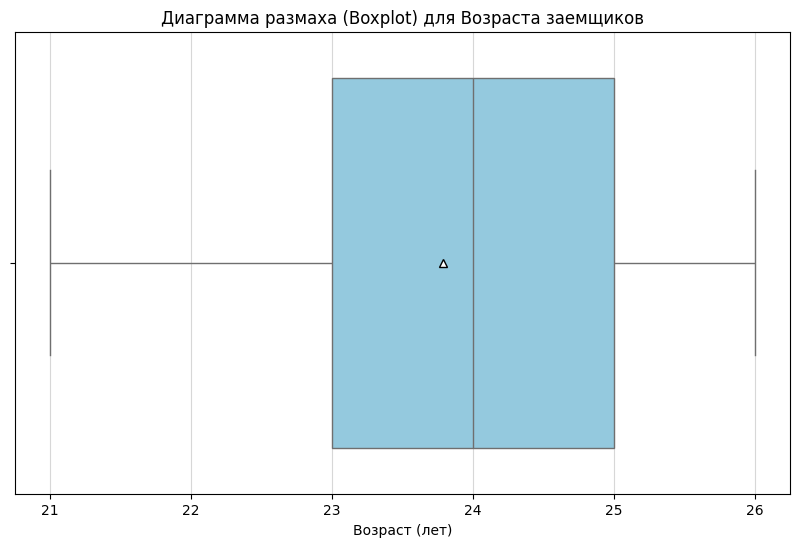

In [24]:
plt.figure(figsize=(10, 6))

# Строим boxplot для переменной Age
# showmeans=True покажет среднее значение (треугольник) в дополнение к медиане (линия)
sns.boxplot(x=df['Age'], color='skyblue', showmeans=True,
            meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black"})

plt.title('Диаграмма размаха (Boxplot) для Возраста заемщиков')
plt.xlabel('Возраст (лет)')
plt.grid(axis='x', alpha=0.5)

plt.show()


Диапазон данных: Весь массив данных укладывается в узкий интервал от 21 до 26 лет. Это подтверждает, что банк работает с очень специфической, молодой аудиторией (студенты и недавние выпускники).

Центральная тенденция:
Медиана (линия внутри ящика): около 24 лет.
Среднее (треугольник): практически совпадает с медианой, что говорит о симметричности распределения внутри этого узкого диапазона.
Межквартильный размах:
Q1 (25-й перцентиль): 23 года.
Q3 (75-й перцентиль): 25 лет.

Половина всех клиентов (центральные 50%) — это люди в возрасте 23–25 лет.
Усы и Выбросы:
Нижний ус: 21 год.
Верхний ус: 26 лет.

Вывод:
График доказывает, что фактор возраста в данной выборке имеет минимальную вариативность (всего 5 лет разброса). Следовательно, возраст вряд ли будет сильным предиктором в модели машинного обучения, так как "все клиенты — ровесники". Основной вес в принятии решений будет лежать на доходах и кредитной истории, а не на возрасте.

### 8. Boxplot по категории дохода

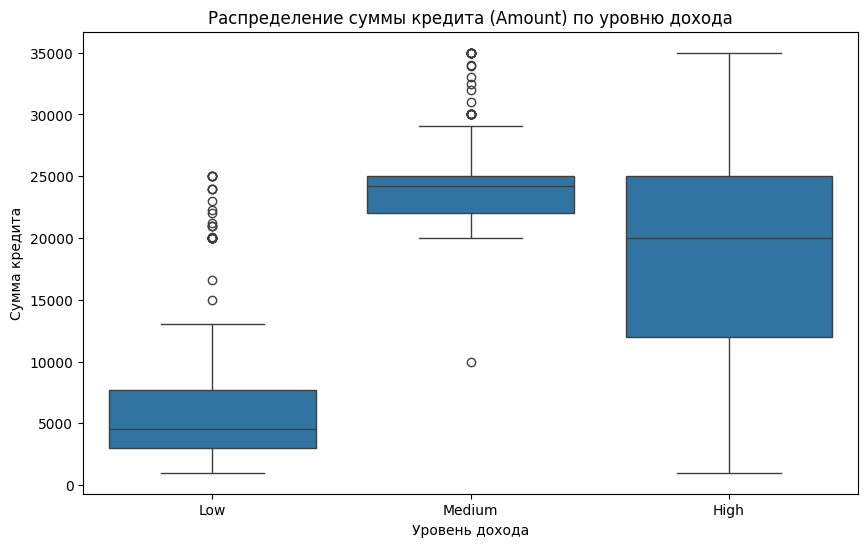

In [25]:
# 1. Создаем категорию уровня зарплаты (Income Level)
# Определим границы квартилей для объективности
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)

def get_income_level(income):
    if income < q1:
        return 'Low'
    elif income > q3:
        return 'High'
    else:
        return 'Medium'

df['Income_Level'] = df['Income'].apply(get_income_level)

plt.figure(figsize=(10, 6))
# Строим boxplot: Распределение Суммы кредита (Amount) по Уровню дохода
sns.boxplot(data=df, x='Income_Level', y='Amount', order=['Low', 'Medium', 'High'])
plt.title('Распределение суммы кредита (Amount) по уровню дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Сумма кредита')
plt.show()

График показывает распределение суммы кредита (Amount) в зависимости от уровня дохода клиента:
Low (нижние 25% по доходу)
Medium (средние 50%)
High (верхние 25%)

Группа Low:
Медиана: ~4 500 у.е.
Разброс (Box): Очень узкий и сжатый (25% - 75% лежат между 3 000 и 8 000).
Бедные клиенты берут только маленькие кредиты. "Усы" графика заканчиваются на 13 000, выше этой суммы им кредиты практически не дают (или они не просят).

Группа Medium:
Медиана: ~24 000 у.е. (Резкий скачок!).
Разброс: Коробка очень компактная, но расположена высоко.
Парадокс среднего класса: Средний класс массово берет кредиты именно на суммы 20 000 – 25 000 (видимо, машины или образование). Это самая закредитованная группа в абсолютных числах.

Группа High:
Медиана: ~20 000 у.е. (Ниже, чем у Medium!).
Разброс: Гигантский (от 1 000 до 35 000).
Богатые ведут себя непредсказуемо. Они могут взять как микрокредит на 1000 (просто так), так и максимальный кредит на 35 000. В отличие от бедных (которым нельзя много) и средних (которым нужно много), богатые имеют полную свободу выбора.

Общий вывод:
Самыми агрессивными заемщиками являются представители среднего класса (Medium). Они берут самые большие суммы и делают это массово (узкий боксплот говорит о схожести их поведения).

### 9. Сложные boxplot по двум категориям

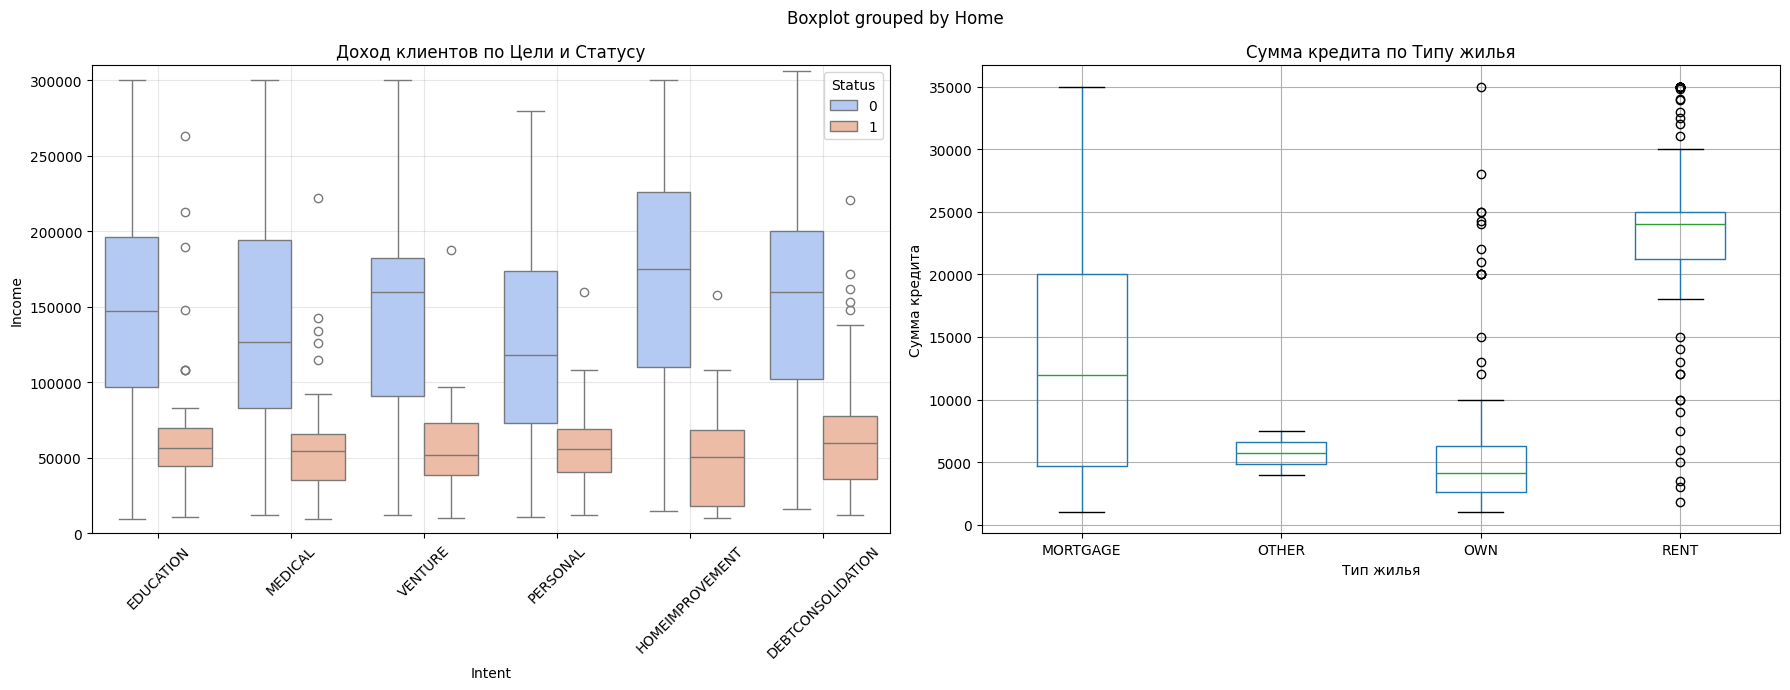

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Доход клиентов по Цели кредита и Статусу
sns.boxplot(data=df, x='Intent', y='Income', hue='Status', ax=ax[0], palette='coolwarm')
ax[0].set_title('Доход клиентов по Цели и Статусу')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylim(0, 310000) # Ограничим, чтобы видеть суть
ax[0].grid(True, alpha=0.3)

df.boxplot(column='Amount', by='Home', ax=ax[1], grid=True, rot=0)

# Настройка оформления для Pandas графика
ax[1].set_title('Сумма кредита по Типу жилья')
ax[1].set_xlabel('Тип жилья')
ax[1].set_ylabel('Сумма кредита')

plt.tight_layout()
plt.show()

График 1: Доход клиентов по Цели кредита и Статусу (слева)

График показывает распределение дохода (Income) для разных целей кредита, разделенных по статусу дефолта:

Синие боксы (Status = 0, Надежные):
Во всех категориях медианный доход надежных заемщиков значительно выше (в 2-3 раза), чем у дефолтных.
Самые высокие доходы у тех, кто берет кредит на DEBTCONSOLIDATION, VENTURE и HOMEIMPROVEMENT (медианы 125к – 175к).
Это подтверждает гипотезу: высокий доход — лучшая страховка от дефолта, независимо от цели кредита.
Розовые боксы (Status = 1, Дефолт):
Медианный доход дефолтных клиентов во всех категориях колеблется вокруг 50 000 – 60 000 у.е.
Это «потолок риска»: если доход клиента падает до уровня 50к, вероятность дефолта резко возрастает для любой цели кредита.

График 2: Сумма кредита по Жилью и Уровню дохода (справа)

1. MORTGAGE (Ипотека):

Диапазон: Самый широкий разброс сумм — от минимальных (~1000) до максимальных (35 000).
Медиана: Находится на уровне ~12 000 у.е.
Особенность: Большой межквартильный размах говорит о том, что ипотечники — самая разнородная группа. Среди них есть как те, кто берет мелкие кредиты, так и те, кто запрашивает максимум.

2. OTHER (Другое):

Диапазон: Очень узкий и низкий.
Медиана: Около 5 000 – 6 000 у.е.
Особенность: Крайне консервативная группа. Видимо, это социальное жилье или проживание с родителями, где кредитный потенциал сильно ограничен.

3. OWN (Собственники):

Диапазон: Схож с группой OTHER, но имеет много выбросов сверху.
Медиана: Около 4 000 – 5 000 у.е. — это самая низкая медиана среди всех групп.
Особенность: Собственники жилья в массе своей берут очень маленькие кредиты. Однако наличие множества выбросов (точек) до 35 000 говорит о том, что отдельные собственники всё же берут крупные суммы, но это скорее исключение, чем правило.

4. RENT (Арендаторы):

Диапазон: Сдвинут вверх.
Медиана: Самая высокая — около 24 000 у.е.
Особенность: Арендаторы массово берут крупные кредиты (тело ящика находится высоко). При этом у них много "выбросов вниз" — это те, кто берет мало.

Вывод по графику:
Тип жилья радикально меняет кредитное поведение. Арендаторы (RENT) склонны к максимизации кредита, тогда как собственники (OWN) ведут себя крайне сдержанно. Ипотечники (MORTGAGE) демонстрируют самую высокую вариативность поведения.

### 10. Общие выводы по работе

В ходе выполнения лабораторной работы был проведен полный цикл исследовательского анализа данных (EDA) кредитного портфеля банка. Была выполнена предобработка данных (удаление пропусков, дубликатов и аномальных выбросов), а также детальная визуализация зависимостей.

1. Качество данных

Исходный датасет содержал критические ошибки: пропуски в стаже (Emp_length) и ставке (Rate), а также нереалистичные выбросы в возрасте (144 года) и стаже (123 года).

После очистки данных выборка показала свою специфику: это молодежный сегмент (основная масса клиентов — 21–26 лет), преимущественно с небольшим стажем работы.

2. Портрет клиента

Типичный заемщик: Молодой человек 23–25 лет, арендующий жилье (RENT), с годовым доходом 40–60 тыс. у.е., запрашивающий кредит на сумму 5 000 – 10 000 у.е.

Самый активный сегмент: Представители среднего класса (доход 50–80 тыс.), которые склонны брать максимальные суммы кредитов (20 000 – 25 000 у.е.), создавая высокую долговую нагрузку.

3. Факторы кредитного риска (Дефолта)
Анализ выявил ключевые маркеры, влияющие на вероятность невозврата кредита (Status = 1):

Долговая нагрузка (Percent_income): Главный фактор риска. Коэффициент корреляции с дефолтом 0.67. Если платеж превышает 40% от дохода, вероятность дефолта становится критической.

Тип жилья: Клиенты, арендующие жилье (RENT), допускают дефолты в 2 раза чаще, чем возвращают кредиты. Напротив, клиенты с ипотекой (MORTGAGE) являются самыми надежными.

Доход: Высокий доход является лучшей страховкой от дефолта (корреляция -0.59). При доходе выше 100 000 у.е. риск дефолта минимален, независимо от цели кредита.

Возраст и Стаж: В данной (молодой) выборке эти факторы играют второстепенную роль и слабо коррелируют с надежностью заемщика.

4. Бизнес-инсайты

Парадокс среднего класса: Наибольшее количество дефолтов приходится не на бедных (им просто не дают большие суммы), а на «средний класс», которому банк одобряет кредиты с нагрузкой, близкой к предельной (40-50% дохода).

Кредитная политика: Банк использует жесткие лимиты ("потолок" кредита ~25 000 у.е. для большинства клиентов), но, возможно, недостаточно строго оценивает риски для категории арендаторов (RENT).

Заключение:
Данные готовы для построения моделей машинного обучения. Наиболее сильными предикторами для модели станут Percent_income, Income и Home_Ownership. Использование возраста и стажа в качестве признаков потребует осторожности из-за узости диапазона выборки.